In [5]:
import os
import sys
import math
import uproot
import numpy as np

from scipy    import stats
from datetime import datetime

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [6]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import peak_functions as pf
import fit_functions  as fitf

In [7]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 13

In [8]:
filename = '/Users/romoluque_c/LEGEND/BACON/datatest/NewSiPMCal_53V.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

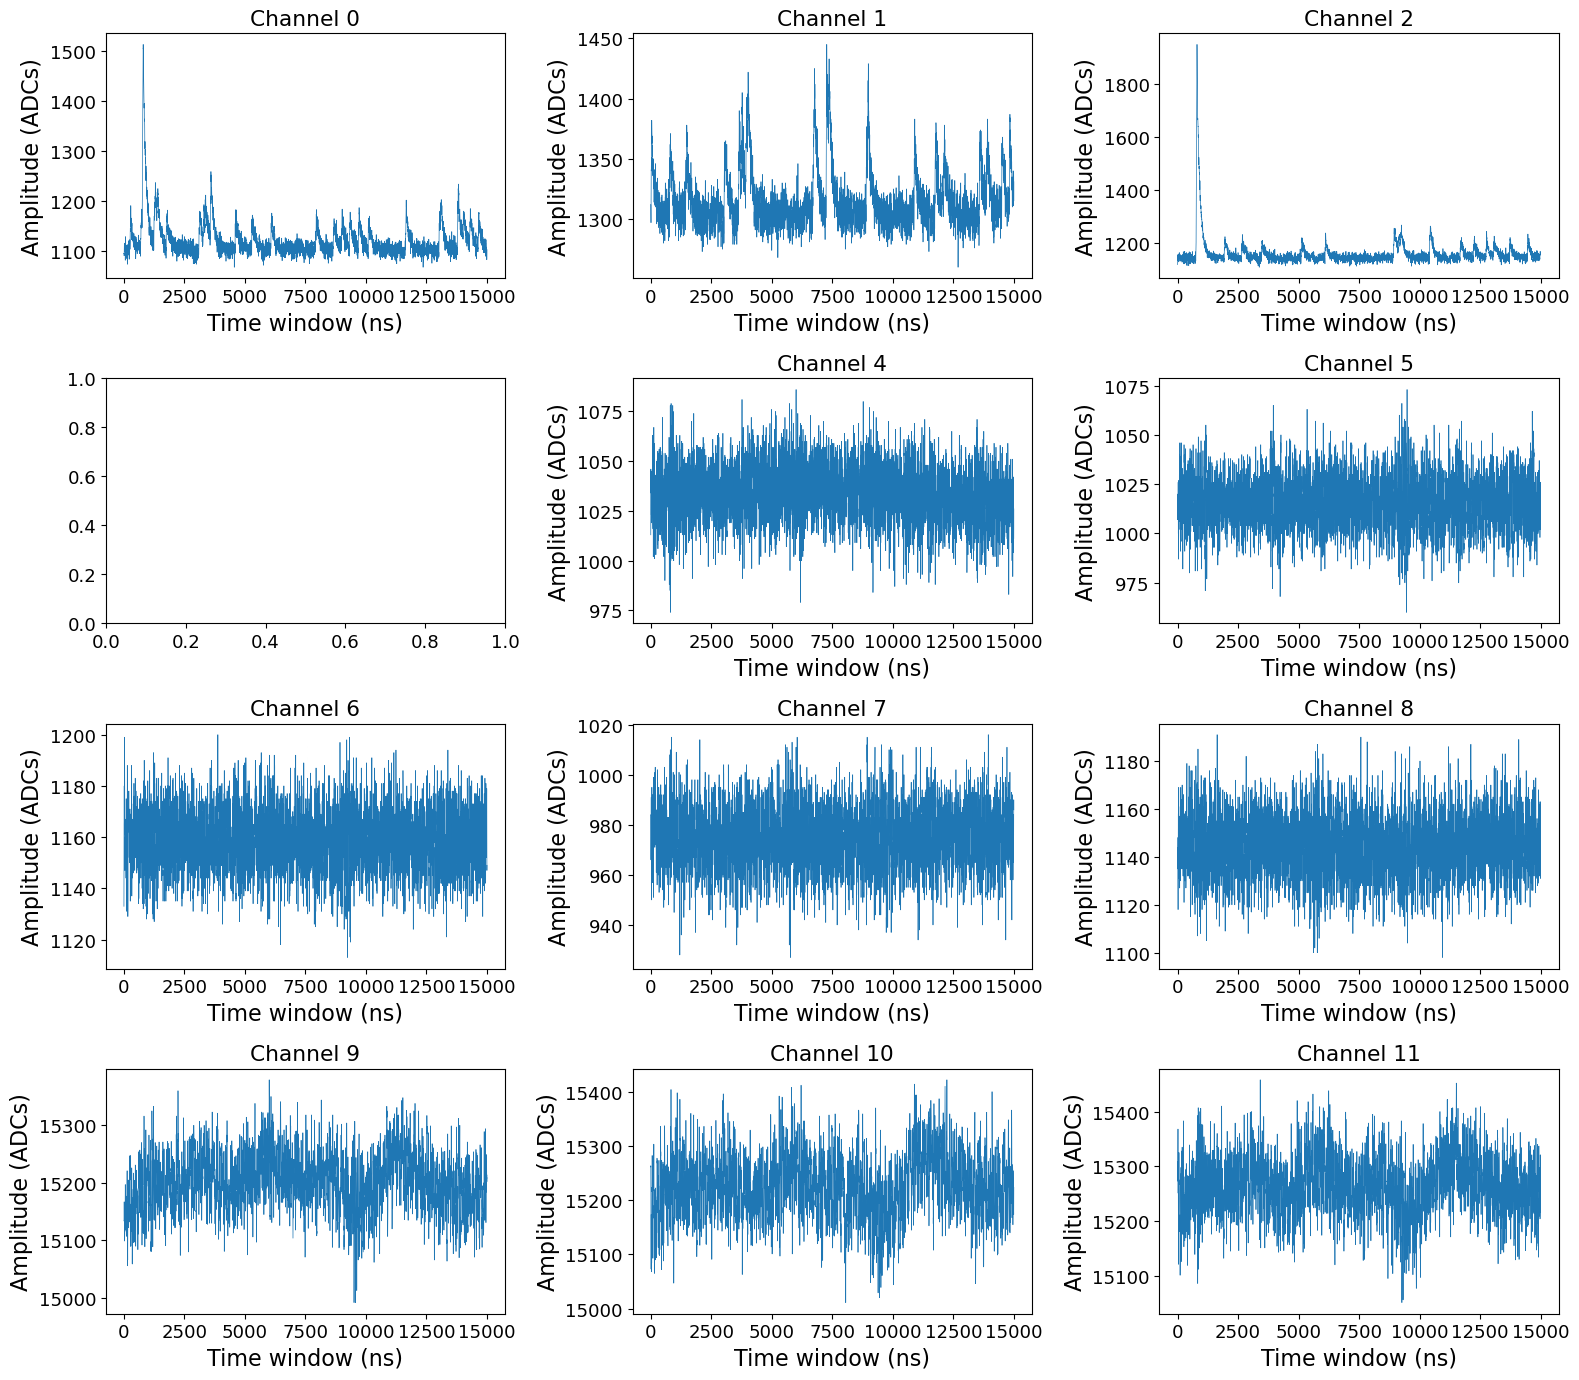

In [9]:
choose_evt = 4
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    if k==3: continue
    i = int(k/3)
    j = k%3
    wf = np.array(RawTree[f'chan{k}/rdigi'].array())[choose_evt]
    axs[i][j].plot(2*np.arange(len(wf)), wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
plt.tight_layout()
plt.show()

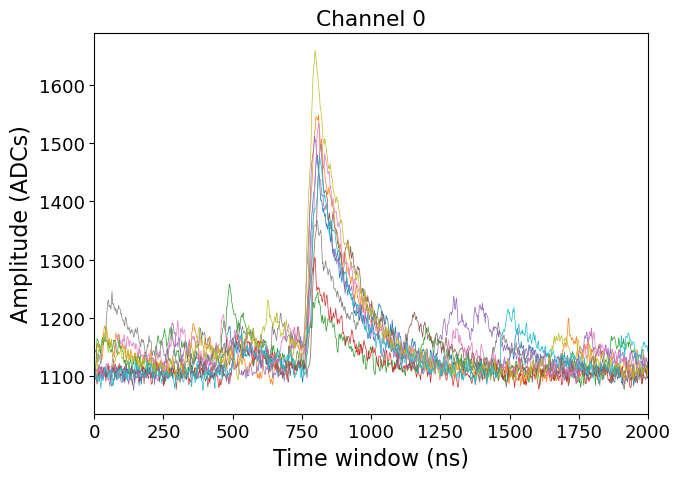

In [14]:
plt.figure(figsize=(7, 5))
channel  = 0
for evt in range(10):
    wf = np.array(RawTree[f'chan{channel}/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

In [15]:
#num_evts = 100
chan0 = 0
chan1 = 1
chan2 = 2
wfs_channel0 = np.array(RawTree[f'chan{chan0}/rdigi'].array())#[:num_evts]
wfs_channel1 = np.array(RawTree[f'chan{chan1}/rdigi'].array())#[:num_evts]
wfs_channel2 = np.array(RawTree[f'chan{chan2}/rdigi'].array())#[:num_evts]
subt_raw_wfs0 = list(map(pf.subtract_baseline, wfs_channel0))
subt_raw_wfs1 = list(map(pf.subtract_baseline, wfs_channel1))
subt_raw_wfs2 = list(map(pf.subtract_baseline, wfs_channel2))

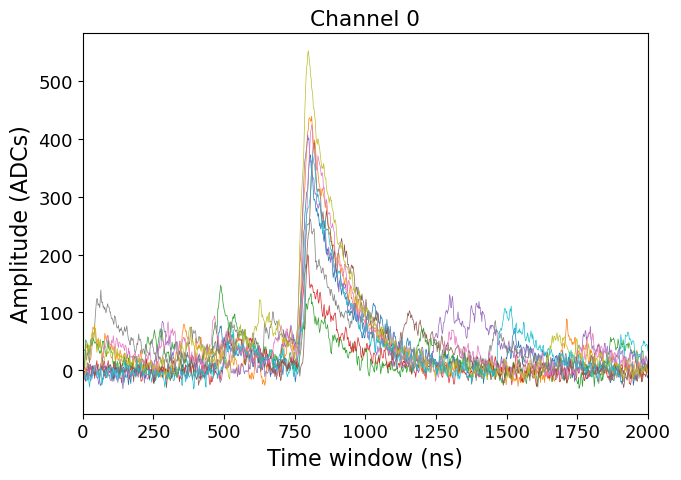

In [16]:
plt.figure(figsize=(7, 5))
channel  = 0
for evt in range(10):
    plt.plot(2*np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

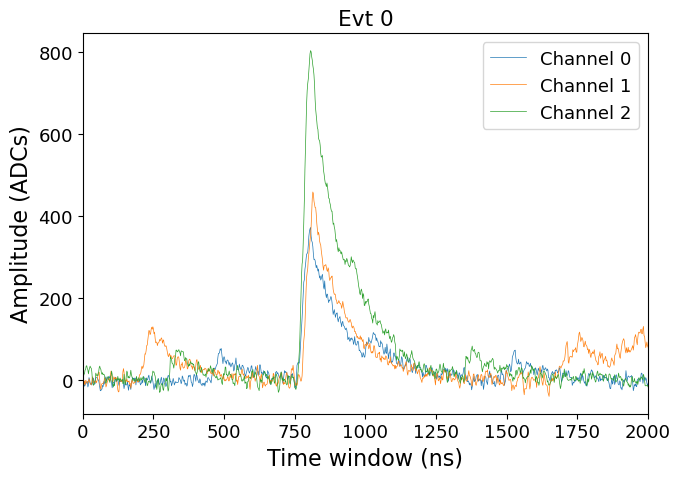

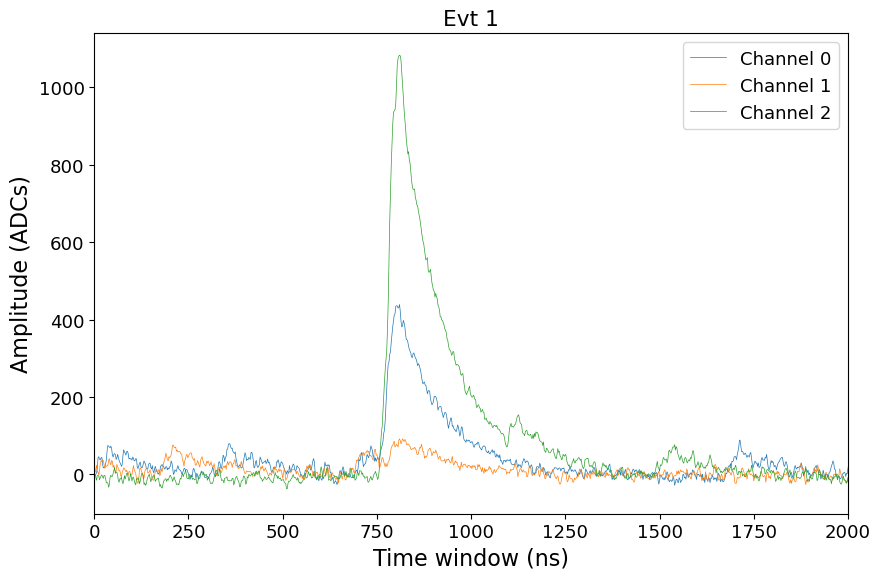

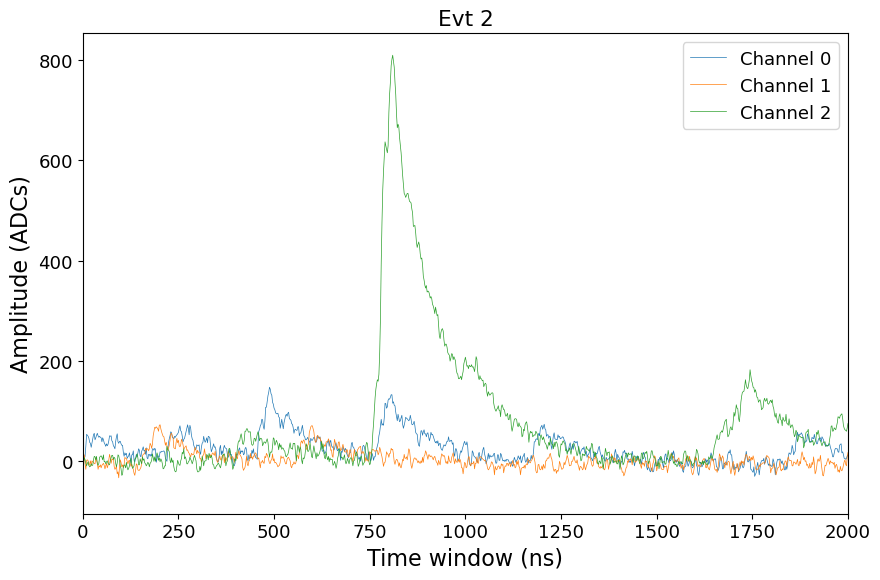

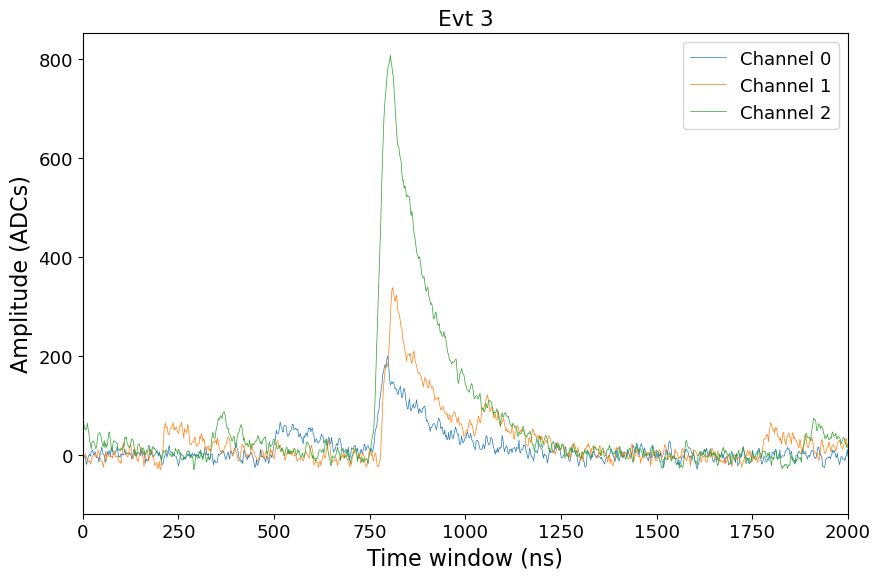

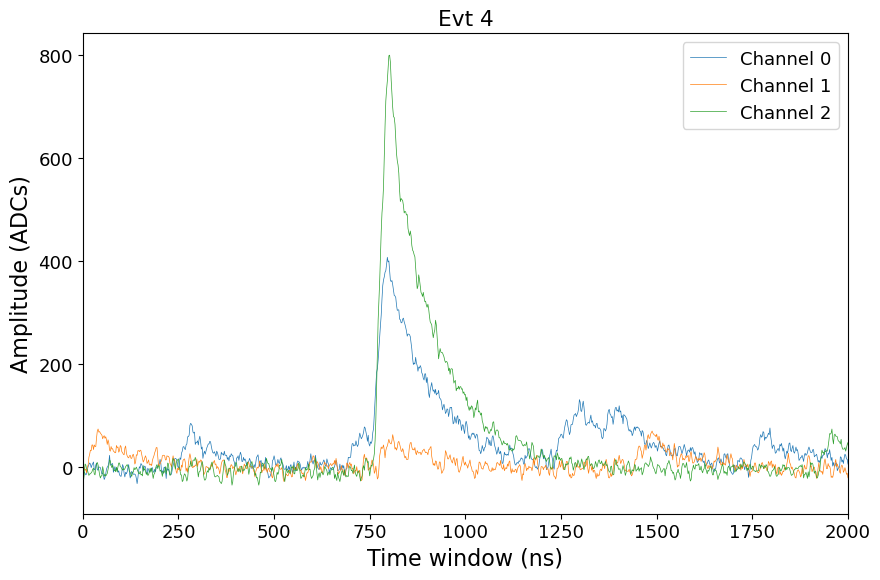

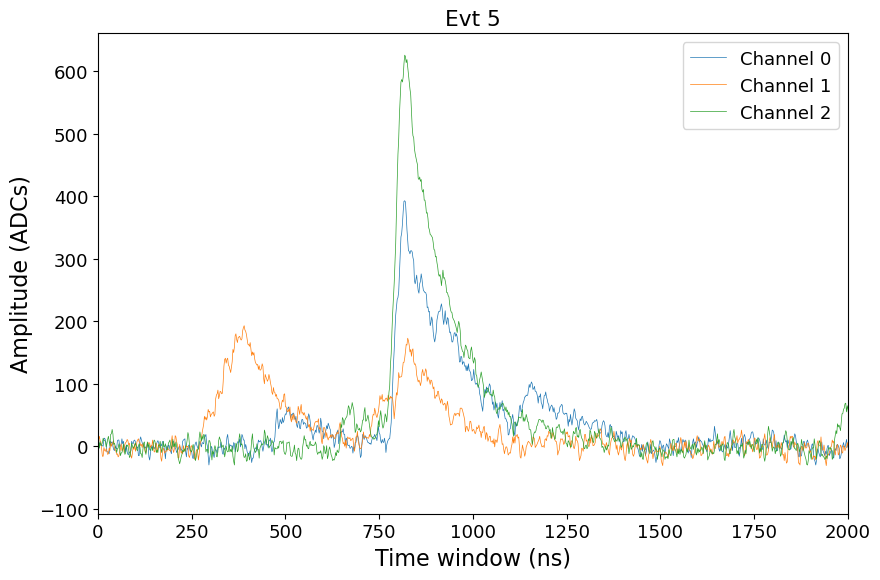

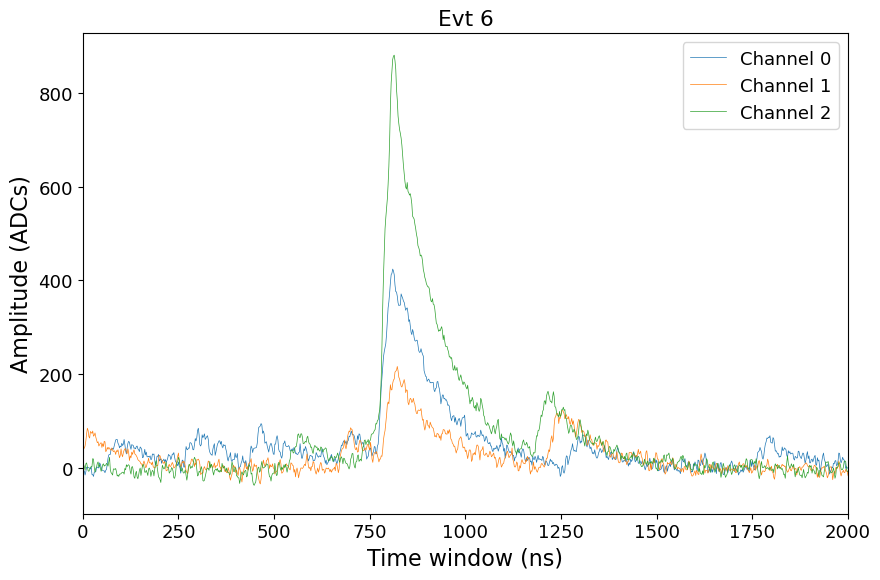

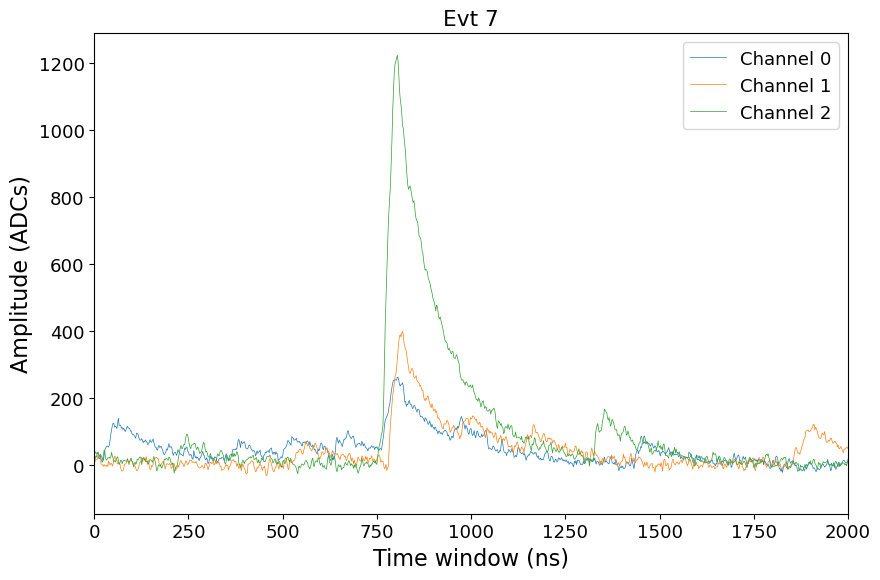

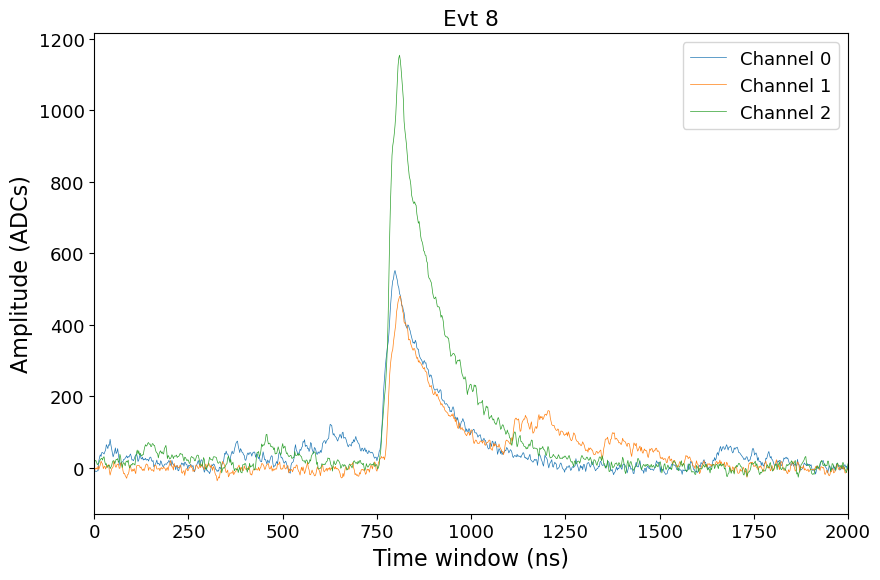

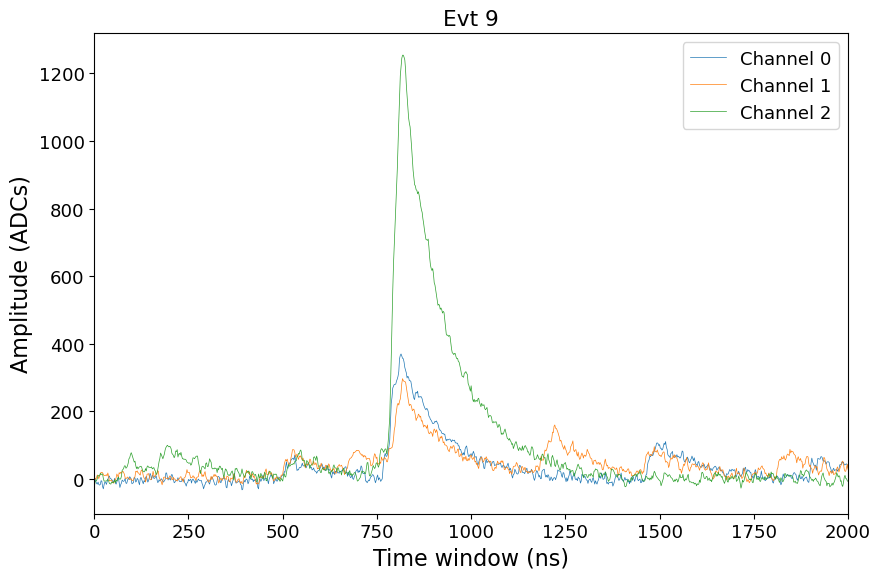

In [77]:
plt.figure(figsize=(7, 5))
for evt in range(10):
    plt.plot(2*np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5, label='Channel 0')
    plt.plot(2*np.arange(len(subt_raw_wfs1[evt])), subt_raw_wfs1[evt], linewidth=0.5, label='Channel 1')
    plt.plot(2*np.arange(len(subt_raw_wfs2[evt])), subt_raw_wfs2[evt], linewidth=0.5, label='Channel 2')
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADCs)', fontsize=16)
    plt.xlim(0,2000)
    plt.title(f"Evt {evt}")
    plt.tight_layout()
    plt.legend()
    plt.show()

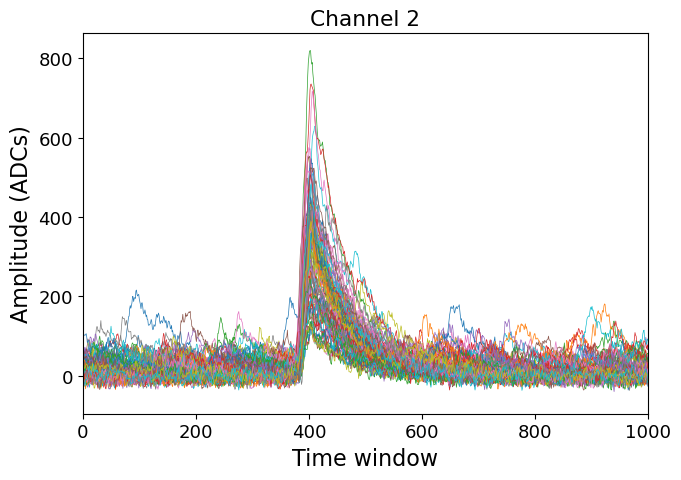

In [78]:
plt.figure(figsize=(7, 5))
channel  = 2
num_evts = 100
for evt in range(num_evts):
    plt.plot(np.arange(len(subt_raw_wfs0[evt])), subt_raw_wfs0[evt], linewidth=0.5)
plt.xlabel('Time window', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.xlim(0,1000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

In [73]:
max_wf0 = np.array([np.max(subt_raw_wfs0[evt][350:500]) for evt in range(len(subt_raw_wfs0))])
max_wf1 = np.array([np.max(subt_raw_wfs1[evt][350:500]) for evt in range(len(subt_raw_wfs1))])
max_wf2 = np.array([np.max(subt_raw_wfs2[evt][350:500]) for evt in range(len(subt_raw_wfs2))])

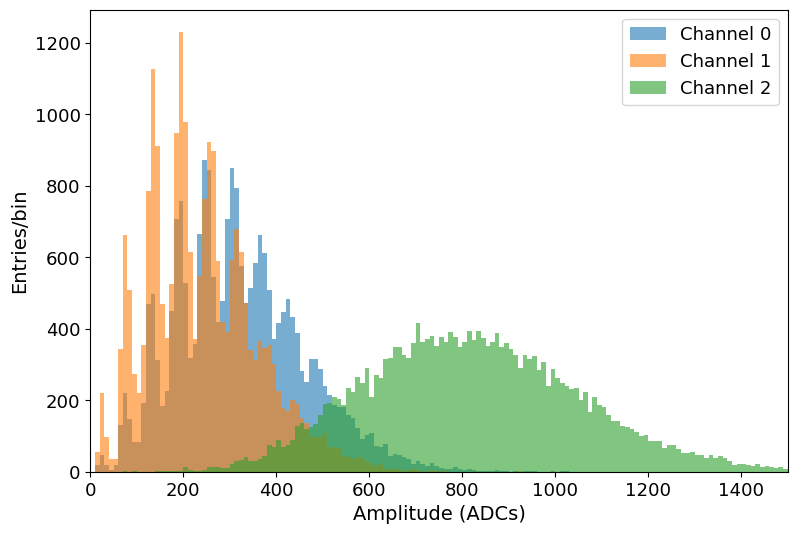

In [75]:
plt.hist(max_wf0, bins=150, range=(0, 1500), alpha=0.6, label='Channel 0')
plt.hist(max_wf1, bins=150, range=(0, 1500), alpha=0.6, label='Channel 1')
plt.hist(max_wf2, bins=150, range=(0, 1500), alpha=0.6, label='Channel 2')
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
plt.xlim(0, 1500)
plt.legend()
plt.show()

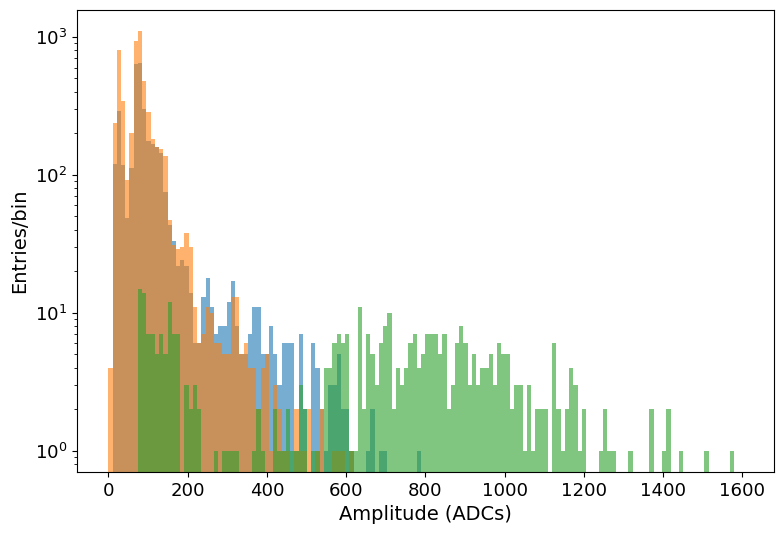

In [28]:
plt.hist(heights0, bins=150, range=(0, 1600), alpha=0.6, log=True)
plt.hist(heights1, bins=150, range=(0, 1600), alpha=0.6, log=True)
plt.hist(heights2, bins=150, range=(0, 1600), alpha=0.6, log=True)
plt.xlabel('Amplitude (ADCs)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
plt.show()